# Lab | Cleaning numerical data

## Context:
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

## Some business Objectives:
* Retain customers,
* Analyze relevant customer data,
* Develop focused customer retention programs.
* Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

## Data Analysis Process
* Case Study
* Get data
* Cleaning/Wrangling/EDA
* Processing Data
* Modeling -Validation
* Reporting

## Lab | 1 | Import libraries
Import the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Lab | 2 | Get data

In [2]:
# Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

## Lab | 3 | Explore data

In [3]:
# First look at its main features (head, shape, info). NOTE The target column is total_claim_amount
data.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      Policy Type        Policy  Renew Offer Type  Sales Channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

In [4]:
data.shape

(9134, 24)

In [5]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

## Lab | 4 | Chage columns names

In [7]:
# Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
data.columns = [col.replace(' ', '_') for col in data.columns]
data.columns

Index(['Customer', 'State', 'Customer_Lifetime_Value', 'Response', 'Coverage',
       'Education', 'Effective_To_Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location_Code', 'Marital_Status', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy_Type',
       'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Total_Claim_Amount',
       'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

## Lab | 5 | Change 'effective to date' format

In [8]:
# Change effective to date column to datetime format.
display(data['Effective_To_Date'].head(),
        data['Effective_To_Date'].dtype)

0    2/24/11
1    1/31/11
2    2/19/11
3    1/20/11
4     2/3/11
Name: Effective_To_Date, dtype: object

dtype('O')

In [9]:
data['Effective_To_Date']=pd.to_datetime(data['Effective_To_Date'])
display(data['Effective_To_Date'].head(),
        data['Effective_To_Date'].dtype)

0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
Name: Effective_To_Date, dtype: datetime64[ns]

dtype('<M8[ns]')

## Lab | 6 | Create numerical_df

In [10]:
# Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.
numerical_df=data.select_dtypes('number')
numerical_df.columns

Index(['Customer_Lifetime_Value', 'Income', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies',
       'Total_Claim_Amount'],
      dtype='object')

## Lab | 7 | Differentiate Continuos-Discrete variables

In [11]:
# Define a function that differentiates between continuous and discrete variables. 
# Hint: The number of unique values might be useful. 
# Store continuous data into a continuous_df variable and do the same for discrete_df

def categorize_variables(dataframe, threshold=0.03):
    continuous_columns = []
    discrete_columns = []

    for column in dataframe.columns:
        unique_count = len(dataframe[column].unique())
        if unique_count / dataframe.shape[0] < threshold:
            discrete_columns.append(column)
        else:
            continuous_columns.append(column)

    continuous_df = dataframe[continuous_columns]
    discrete_df = dataframe[discrete_columns]
    
    return continuous_df, discrete_df

In [12]:
continuous_df, discrete_df = categorize_variables(numerical_df)

In [13]:
print("Continuous Columns:")
print(continuous_df.columns)

Continuous Columns:
Index(['Customer_Lifetime_Value', 'Income', 'Total_Claim_Amount'], dtype='object')


In [14]:
print('Customer_Lifetime_Value ',len(numerical_df['Customer_Lifetime_Value'].value_counts()))
print('Income ',len(numerical_df['Income'].value_counts()))
print('Total_Claim_Amount ',len(numerical_df['Total_Claim_Amount'].value_counts()))

Customer_Lifetime_Value  8041
Income  5694
Total_Claim_Amount  5106


In [15]:
print("Discrete Columns:")
print(discrete_df.columns)

Discrete Columns:
Index(['Monthly_Premium_Auto', 'Months_Since_Last_Claim',
       'Months_Since_Policy_Inception', 'Number_of_Open_Complaints',
       'Number_of_Policies'],
      dtype='object')


In [16]:
print('Monthly_Premium_Auto ',len(numerical_df['Monthly_Premium_Auto'].value_counts()))
print('Months_Since_Last_Claim ',len(numerical_df['Months_Since_Last_Claim'].value_counts()))
print('Months_Since_Policy_Inception ',len(numerical_df['Months_Since_Policy_Inception'].value_counts()))
print('Number_of_Open_Complaints ',len(numerical_df['Number_of_Open_Complaints'].value_counts()))
print('Number_of_Policies ',len(numerical_df['Number_of_Policies'].value_counts()))

Monthly_Premium_Auto  202
Months_Since_Last_Claim  36
Months_Since_Policy_Inception  100
Number_of_Open_Complaints  6
Number_of_Policies  9


## Lab | 8 | Correlation matrix

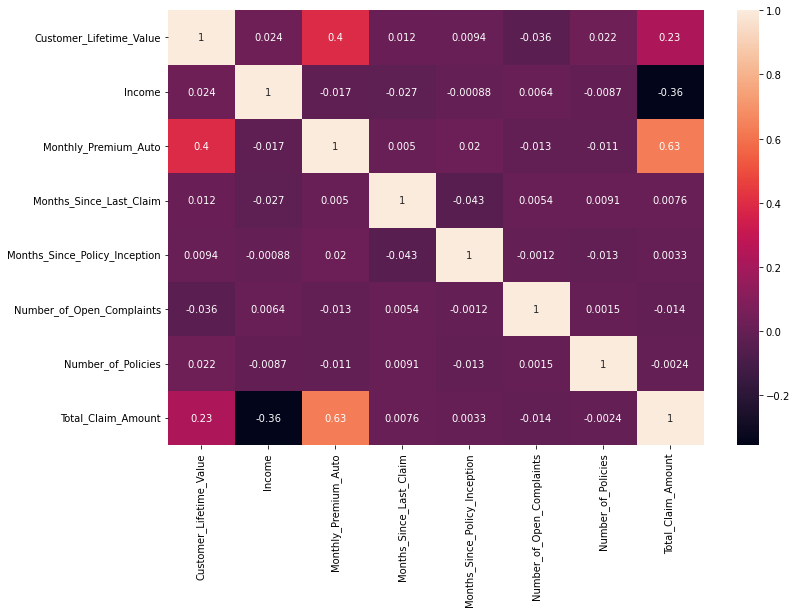

In [17]:
# Plot a correlation matrix, comment what you see.
corr_matrix=numerical_df.corr()  # default
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [18]:
# +Corr between Total Claim Amount and Customer lifetime value and monthly premium auto, and -Corr with income

## Lab | 9 | Plot discrete variables

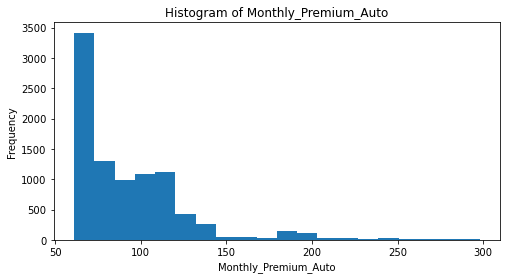

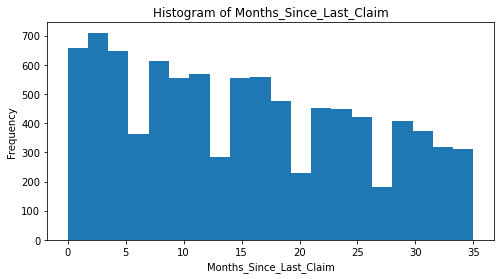

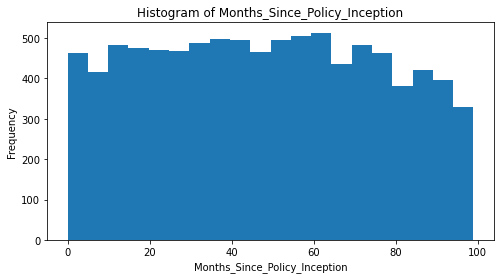

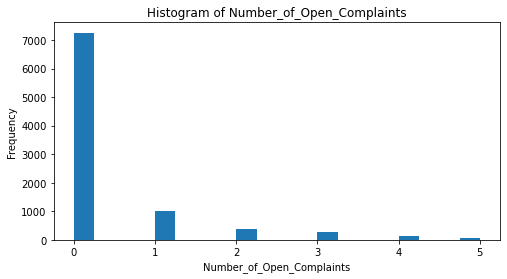

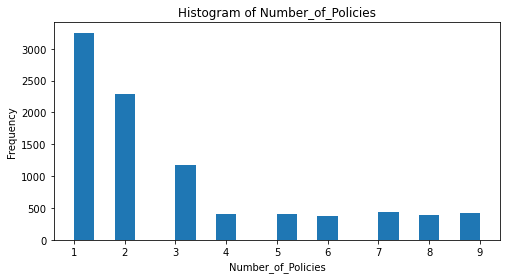

In [19]:
# Create a function to plot every discrete variable. 
# Do the same with the continuous variables 
# (Be Careful, you may need to change the plot type to one better suited for continuous data!)

import matplotlib.pyplot as plt

def plot_all_columns(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(8, 4))
        plt.hist(dataframe[column], bins=20)  # You can adjust the number of bins as needed
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

plot_all_columns(discrete_df)

## Lab | 9 | Plot continuous variables

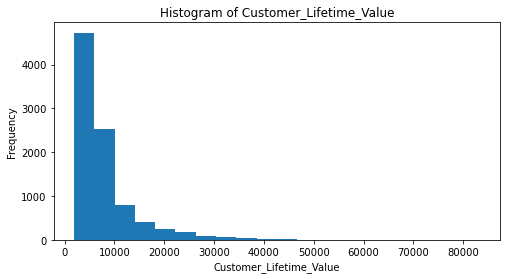

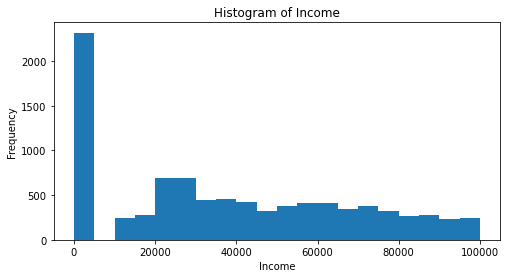

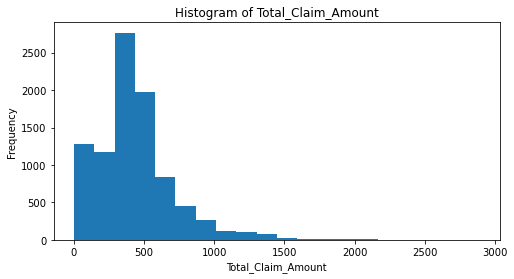

In [20]:
df = pd.DataFrame(continuous_df)
plot_all_columns(df)

## Lab | 10 | Analysis

In [21]:
# Comment what you can see in the plots.

In [22]:
numerical_df['Income'].value_counts()
# 2317 over the 9134 have 0 income, I confirmed that all of them are unemployed
filtered_data = data[data['Income'] == 0]
grouped_data = filtered_data.groupby(['Income', 'EmploymentStatus']).size().reset_index(name='Count')
print(grouped_data)

# data_crosstab = pd.crosstab(matrix_donors['DOMAIN'], matrix_donors['MDMAUD'], margins=False) #con margin=true tengo totales
# , margins=False)

   Income EmploymentStatus  Count
0       0       Unemployed   2317


In [23]:
numerical_df['Number_of_Open_Complaints'].value_counts()
# theres 7252 with 0 open complaints, it´s not an issue considering that not every costumer is expected to issue a claim...

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: Number_of_Open_Complaints, dtype: int64

## Lab | 11 | Plot outliers

In [24]:
# Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)
# Plot the boxplot
numerical_df.columns

Index(['Customer_Lifetime_Value', 'Income', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies',
       'Total_Claim_Amount'],
      dtype='object')

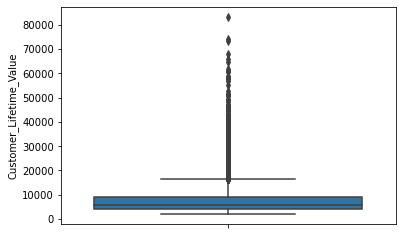

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the boxplot
sns.boxplot(y=numerical_df['Customer_Lifetime_Value'])
plt.show()

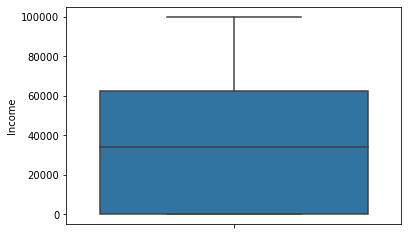

In [26]:

sns.boxplot(y=numerical_df['Income'])
plt.show()

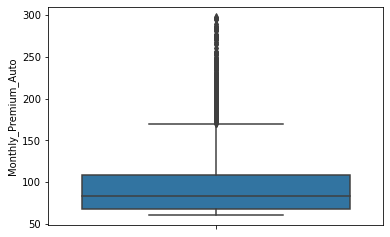

In [27]:
sns.boxplot(y=numerical_df['Monthly_Premium_Auto'])
plt.show()

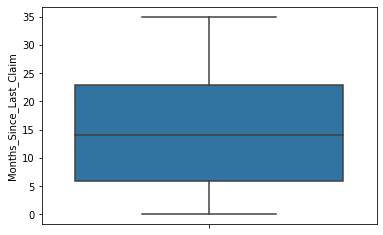

In [28]:
sns.boxplot(y=numerical_df['Months_Since_Last_Claim'])
plt.show()

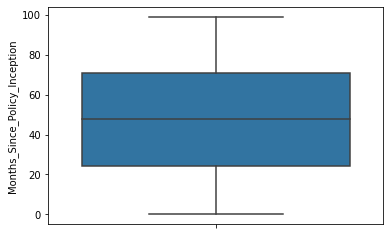

In [29]:
sns.boxplot(y=numerical_df['Months_Since_Policy_Inception'])
plt.show()

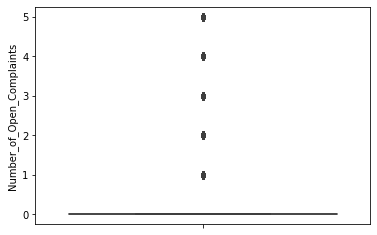

In [30]:
sns.boxplot(y=numerical_df['Number_of_Open_Complaints'])
plt.show()

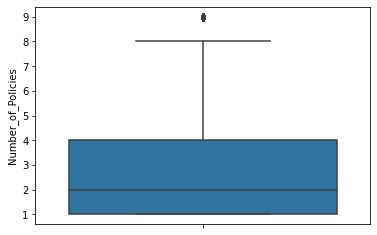

In [31]:
sns.boxplot(y=numerical_df['Number_of_Policies'])
plt.show()

## Lab | 12 | Outliers

In [32]:
# Did you find outliers? Comment what you will do with them. 
# If you decide to remove them, do that now. Also, remove them from your main dataframe.

In [33]:
numerical_df['Customer_Lifetime_Value'].value_counts().tail(10).sort_index(ascending=True)

2374.147419    1
2611.836866    1
2655.996158    1
4603.975141    1
5641.359160    1
6874.848270    1
7380.086414    1
7591.109246    1
9162.063169    1
9934.865795    1
Name: Customer_Lifetime_Value, dtype: int64

In [34]:
numerical_df['Monthly_Premium_Auto'].value_counts().tail(10).sort_index(ascending=True)

178    1
204    1
232    1
248    1
268    1
273    1
275    1
281    1
286    1
287    1
Name: Monthly_Premium_Auto, dtype: int64

In [35]:
numerical_df['Number_of_Open_Complaints'].value_counts().head(10).sort_index(ascending=True)

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: Number_of_Open_Complaints, dtype: int64

In [36]:
numerical_df['Number_of_Policies'].value_counts().head(15).sort_index(ascending=True)

1    3251
2    2294
3    1168
4     409
5     407
6     372
7     433
8     384
9     416
Name: Number_of_Policies, dtype: int64

### Lab | 13 | Check NaN values

In [37]:
# Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.
numerical_df.isna().sum()

Customer_Lifetime_Value          0
Income                           0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
Total_Claim_Amount               0
dtype: int64

In [38]:
numerical_df.isnull().sum()

Customer_Lifetime_Value          0
Income                           0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
Total_Claim_Amount               0
dtype: int64

## Lab | 14 | Save numeric.csv

In [39]:
# Save the numerical_df to csv as numerical.csv You will use this file again this week.
file_path = "numerical.csv"

# Save the DataFrame to the CSV file
numerical_df.to_csv(file_path, index=False)  # Set index to False to exclude the index column

# Confirm that the DataFrame has been saved to the CSV file
print(f"DataFrame saved to {file_path}")

DataFrame saved to numerical.csv


# Lab | Cleaning categorical data

## Lab | 1-2 | Get data

In [40]:
# Open the notebook created for Lab-cleaning-numerical-data.
# Find all of the categorical data. Save it in a categorical_df variable.

In [41]:
categorical_df = data.select_dtypes(exclude=['number'])
categorical_df.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective_To_Date', 'EmploymentStatus', 'Gender', 'Location_Code',
       'Marital_Status', 'Policy_Type', 'Policy', 'Renew_Offer_Type',
       'Sales_Channel', 'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

## Lab | 3 | NaN values

In [42]:
# Check for NaN values and decide what to do with them, do it now.
categorical_df.isna().sum()

Customer             0
State                0
Response             0
Coverage             0
Education            0
Effective_To_Date    0
EmploymentStatus     0
Gender               0
Location_Code        0
Marital_Status       0
Policy_Type          0
Policy               0
Renew_Offer_Type     0
Sales_Channel        0
Vehicle_Class        0
Vehicle_Size         0
dtype: int64

## Lab | 4 | Unique values of columns

In [43]:
# Check all unique values of columns.

In [44]:
categorical_df.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective_To_Date', 'EmploymentStatus', 'Gender', 'Location_Code',
       'Marital_Status', 'Policy_Type', 'Policy', 'Renew_Offer_Type',
       'Sales_Channel', 'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

In [45]:
categorical_df['State'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

In [46]:
categorical_df['Response'].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

In [47]:
categorical_df['Coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

In [48]:
categorical_df['Education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

In [49]:
categorical_df['EmploymentStatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

In [50]:
categorical_df['Gender'].value_counts()

F    4658
M    4476
Name: Gender, dtype: int64

In [51]:
categorical_df['Location_Code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: Location_Code, dtype: int64

In [52]:
categorical_df['Marital_Status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: Marital_Status, dtype: int64

In [53]:
categorical_df['Policy_Type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy_Type, dtype: int64

In [54]:
categorical_df['Policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

In [55]:
categorical_df['Renew_Offer_Type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew_Offer_Type, dtype: int64

In [56]:
categorical_df['Sales_Channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales_Channel, dtype: int64

In [57]:
categorical_df['Vehicle_Class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle_Class, dtype: int64

In [58]:
categorical_df['Vehicle_Size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: Vehicle_Size, dtype: int64

## Lab | 5 | Datatypes

In [59]:
# Check dtypes. Do they all make sense as categorical data? Yes, everything looks perfectly well..
categorical_df.dtypes

Customer                     object
State                        object
Response                     object
Coverage                     object
Education                    object
Effective_To_Date    datetime64[ns]
EmploymentStatus             object
Gender                       object
Location_Code                object
Marital_Status               object
Policy_Type                  object
Policy                       object
Renew_Offer_Type             object
Sales_Channel                object
Vehicle_Class                object
Vehicle_Size                 object
dtype: object

## Lab | 6 | Alphanumeric values

In [60]:
# Does any column contain alpha and numeric data? 
# Decide how to clean it and do it now: Theres's no need to clean, It's the format choosen by the company to identify clients.
categorical_df['Customer'].value_counts()

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: Customer, Length: 9134, dtype: int64

## Lab | 7 | Cleanning or wrangling

In [61]:
# Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.
categorical_df['Combined_Policy'] = categorical_df['Policy'] + ' ' + categorical_df['Policy_Type']
categorical_df['Combined_Policy'].value_counts()

Personal L3 Personal Auto      3426
Personal L2 Personal Auto      2122
Personal L1 Personal Auto      1240
Corporate L3 Corporate Auto    1014
Corporate L2 Corporate Auto     595
Corporate L1 Corporate Auto     359
Special L2 Special Auto         164
Special L3 Special Auto         148
Special L1 Special Auto          66
Name: Combined_Policy, dtype: int64

## Lab | 8 | Combining columns policy and policy type

In [62]:
# Compare policy_type and policy. What information is contained in these columns.
# Can you identify what is important?

import pandas as pd
contingency_table = pd.crosstab(categorical_df['Policy'], categorical_df['Policy_Type'])
contingency_table

# Corporate L1, L2 y L3 are 'Corporate Auto' policy type
# Personal L1, L2 y L3 are 'Personal Auto' policy type
# Special L1, L2 y L3 are 'Special Auto' policy type
# I believe that we can ignore Policy Type column as we have all the information in the Policy column, 
# however I am not sure if we should ignore Policy column instead...

Policy_Type   Corporate Auto  Personal Auto  Special Auto
Policy                                                   
Corporate L1             359              0             0
Corporate L2             595              0             0
Corporate L3            1014              0             0
Personal L1                0           1240             0
Personal L2                0           2122             0
Personal L3                0           3426             0
Special L1                 0              0            66
Special L2                 0              0           164
Special L3                 0              0           148

In [63]:
categorical_df['policy_ptype'] = categorical_df['Policy'] +'-'+ categorical_df['Policy_Type']

In [64]:
categorical_df = categorical_df.drop(['Policy', 'Policy_Type'], axis=1)

In [65]:
categorical_df.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective_To_Date', 'EmploymentStatus', 'Gender', 'Location_Code',
       'Marital_Status', 'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class',
       'Vehicle_Size', 'Combined_Policy', 'policy_ptype'],
      dtype='object')

In [66]:
categorical_df['policy_ptype'].value_counts()

Personal L3-Personal Auto      3426
Personal L2-Personal Auto      2122
Personal L1-Personal Auto      1240
Corporate L3-Corporate Auto    1014
Corporate L2-Corporate Auto     595
Corporate L1-Corporate Auto     359
Special L2-Special Auto         164
Special L3-Special Auto         148
Special L1-Special Auto          66
Name: policy_ptype, dtype: int64

## Lab | 9 | Combining columns

In [67]:
# Check number of unique values in each column, can they be combined in any way to ease encoding?
# Comment your thoughts and make those changes. 
# I already combined Policy and Policy type... I think the rest is fine

## Lab | 10 | Create categorical.csv

In [68]:
# Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.
file_path = "categorical.csv"

# Save the DataFrame to the CSV file
numerical_df.to_csv(file_path, index=False)  # Set index to False to exclude the index column

# Confirm that the DataFrame has been saved to the CSV file
print(f"DataFrame saved to {file_path}")

DataFrame saved to categorical.csv


# Lab | Feature extraction

## Lab | 1-3 | Plot categorical

In [69]:
# Open the categorical dataframe we created before.
# Plot all the categorical variables with the proper plot. What can you see?
# There might be some columns that seem to be redundant, check their values to be sure. 
# What should we do with them?
# Make any changes you feel are necessary.

In [70]:
categorical_df.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective_To_Date', 'EmploymentStatus', 'Gender', 'Location_Code',
       'Marital_Status', 'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class',
       'Vehicle_Size', 'Combined_Policy', 'policy_ptype'],
      dtype='object')

## Lab | 3-5 | Plot time variable

In [71]:
# Plot time variable. Can you extract something from it?
# The time variable can be useful. You shoud transform its data into a more useful form.
# Hint: Day, week, and month as integers might be useful.

In [72]:
categorical_df.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective_To_Date', 'EmploymentStatus', 'Gender', 'Location_Code',
       'Marital_Status', 'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class',
       'Vehicle_Size', 'Combined_Policy', 'policy_ptype'],
      dtype='object')

In [73]:
categorical_df['Day'] = categorical_df['Effective_To_Date'].dt.day
categorical_df['Month'] = categorical_df['Effective_To_Date'].dt.month
categorical_df['Week'] = categorical_df['Effective_To_Date'].dt.isocalendar().week
categorical_df.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective_To_Date', 'EmploymentStatus', 'Gender', 'Location_Code',
       'Marital_Status', 'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class',
       'Vehicle_Size', 'Combined_Policy', 'policy_ptype', 'Day', 'Month',
       'Week'],
      dtype='object')

In [74]:
categorical_df_num=categorical_df.select_dtypes('number')
categorical_df_num.columns

Index(['Day', 'Month', 'Week'], dtype='object')

In [75]:
numerical_df = pd.concat([numerical_df, categorical_df[['Day', 'Month', 'Week']]], axis=1)
numerical_df = numerical_df.loc[:, ~numerical_df.columns.duplicated()]
numerical_df.columns

Index(['Customer_Lifetime_Value', 'Income', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Total_Claim_Amount',
       'Day', 'Month', 'Week'],
      dtype='object')

In [76]:
categorical_df = categorical_df.drop(['Day', 'Month', 'Week','Effective_To_Date'], axis=1)
categorical_df.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location_Code', 'Marital_Status',
       'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class', 'Vehicle_Size',
       'Combined_Policy', 'policy_ptype'],
      dtype='object')

# Lab | Comparing-regression-models

## Lab | 0 | Train_test_split

In [77]:
# Concatenate Numerical and Categorical dataframes into one dataframe called data. Split into X=features y=target.
# separate the features from the labels

In [78]:
categorical_df = categorical_df.drop(['Customer'], axis=1)
categorical_df.columns

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location_Code', 'Marital_Status', 'Renew_Offer_Type',
       'Sales_Channel', 'Vehicle_Class', 'Vehicle_Size', 'Combined_Policy',
       'policy_ptype'],
      dtype='object')

In [79]:
data = pd.concat([categorical_df,numerical_df], axis=1)
data.head()

State Response  Coverage Education EmploymentStatus Gender  \
0  Washington       No     Basic  Bachelor         Employed      F   
1     Arizona       No  Extended  Bachelor       Unemployed      F   
2      Nevada       No   Premium  Bachelor         Employed      F   
3  California       No     Basic  Bachelor       Unemployed      M   
4  Washington       No     Basic  Bachelor         Employed      M   

  Location_Code Marital_Status Renew_Offer_Type Sales_Channel  ... Income  \
0      Suburban        Married           Offer1         Agent  ...  56274   
1      Suburban         Single           Offer3         Agent  ...      0   
2      Suburban        Married           Offer1         Agent  ...  48767   
3      Suburban        Married           Offer1   Call Center  ...      0   
4         Rural         Single           Offer1         Agent  ...  43836   

  Monthly_Premium_Auto Months_Since_Last_Claim Months_Since_Policy_Inception  \
0                   69                      32                             5   
1                   94                      13                            42   
2                  108                      18                            38   
3                  106                      18                            65   
4                   73                      12                            44   

   Number_of_Open_Complaints  Number_of_Policies  Total_Claim_Amount  Day  \
0                          0                   1          384.811147   24   
1                          0                   8         1131.464935   31   
2                          0                   2          566.472247   19   
3                          0                   7          529.881344   20   
4                          0                   1          138.130879    3   

   Month  Week  
0      2     8  
1      1     5  
2      2     7  
3      1     3  
4      2     5  

[5 rows x 25 columns]

In [80]:
data.columns

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location_Code', 'Marital_Status', 'Renew_Offer_Type',
       'Sales_Channel', 'Vehicle_Class', 'Vehicle_Size', 'Combined_Policy',
       'policy_ptype', 'Customer_Lifetime_Value', 'Income',
       'Monthly_Premium_Auto', 'Months_Since_Last_Claim',
       'Months_Since_Policy_Inception', 'Number_of_Open_Complaints',
       'Number_of_Policies', 'Total_Claim_Amount', 'Day', 'Month', 'Week'],
      dtype='object')

In [81]:
# separate the features from the labels
y = data['Total_Claim_Amount']
X = data.drop('Total_Claim_Amount',axis=1)

In [82]:
# X = data.drop('Total_Claim_Amount',axis=1)

In [83]:
#categorical features and numerical ones are going to be treated differently
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

## Lab | 1 | Train_test_split

In [84]:
# 1. In this final lab, we will model our data. Import sklearn `train_test_split` and separate the data.
from sklearn.model_selection import train_test_split

## Lab | 2 | Separate X_train and X_test

In [85]:
# 2. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print('X_train shape is:',X_train.shape)
print('y_train shape is:', y_train.shape)
print('X_test shape is:', X_test.shape)
print('y_train shape is:', y_test.shape)

X_train shape is: (7307, 24)
y_train shape is: (7307,)
X_test shape is: (1827, 24)
y_train shape is: (1827,)


In [86]:
X_train.head()

State Response  Coverage Education EmploymentStatus Gender  \
1212  California       No     Basic   College         Employed      F   
5656  California       No     Basic    Master         Employed      M   
7437      Oregon       No  Extended  Bachelor         Employed      M   
3274  California      Yes     Basic   College       Unemployed      F   
5153  California       No     Basic  Bachelor         Employed      M   

     Location_Code Marital_Status Renew_Offer_Type Sales_Channel  ...  \
1212         Rural         Single           Offer1         Agent  ...   
5656         Urban        Married           Offer4   Call Center  ...   
7437      Suburban        Married           Offer3   Call Center  ...   
3274      Suburban        Married           Offer1         Agent  ...   
5153         Rural        Married           Offer1         Agent  ...   

     Customer_Lifetime_Value Income Monthly_Premium_Auto  \
1212             5328.835851  81064                   70   
5656             2602.650842  41958                   66   
7437             4864.527356  37406                  122   
3274             8002.308333      0                  107   
5153            13345.135450  80277                  112   

     Months_Since_Last_Claim  Months_Since_Policy_Inception  \
1212                      20                              4   
5656                      15                             49   
7437                      23                             38   
3274                       3                             65   
5153                       6                             40   

      Number_of_Open_Complaints  Number_of_Policies  Day  Month  Week  
1212                          4                   3   30      1     4  
5656                          1                   1   24      1     4  
7437                          1                   1    2      1    52  
3274                          0                   3   11      1     2  
5153                          1                   2   28      1     4  

[5 rows x 24 columns]

In [87]:
X_test.head()

State Response  Coverage             Education EmploymentStatus  \
791   California       No     Basic               College         Employed   
1822      Oregon       No     Basic  High School or Below         Employed   
4908      Oregon       No     Basic              Bachelor         Employed   
9100  California       No  Extended              Bachelor         Employed   
6403      Oregon       No  Extended              Bachelor       Unemployed   

     Gender Location_Code Marital_Status Renew_Offer_Type Sales_Channel  ...  \
791       M         Rural       Divorced           Offer3        Branch  ...   
1822      F         Rural       Divorced           Offer3         Agent  ...   
4908      F         Rural        Married           Offer2        Branch  ...   
9100      M      Suburban        Married           Offer2   Call Center  ...   
6403      F      Suburban        Married           Offer3   Call Center  ...   

     Customer_Lifetime_Value Income Monthly_Premium_Auto  \
791              2453.408288  83772                   62   
1822             8692.636838  97768                   72   
4908             5424.256733  67414                   68   
9100             3843.965188  43987                   96   
6403             4648.539191      0                  121   

     Months_Since_Last_Claim  Months_Since_Policy_Inception  \
791                       13                             76   
1822                      22                             14   
4908                       7                             37   
9100                      29                             17   
6403                      11                             10   

      Number_of_Open_Complaints  Number_of_Policies  Day  Month  Week  
791                           0                   1   21      1     3  
1822                          0                   2    8      1     1  
4908                          0                   8   27      2     8  
9100                          0                   1   16      1     2  
6403                          0                   1    1      1    52  

[5 rows x 24 columns]

In [88]:
X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)

In [89]:
X_test_num = X_test.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes(object)

## Lab | 3 | X_train_num to fit scalers

In [90]:
# 3. Use X_train_num to fit scalers.  Transform BOTH X_train_num and X_test_num.
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_train_num)
X_train_norm = transformer.transform(X_train_num)
print(X_train_norm.shape)
X_train_num_scale = pd.DataFrame(X_train_norm, index = X_train_num.index, columns=X_train_num.columns)
X_train_num_scale.head()

(7307, 10)


Customer_Lifetime_Value    Income  Monthly_Premium_Auto  \
1212                 0.042134  0.810794              0.038136   
5656                 0.008654  0.419660              0.021186   
7437                 0.036431  0.374131              0.258475   
3274                 0.074966  0.000000              0.194915   
5153                 0.140581  0.802923              0.216102   

      Months_Since_Last_Claim  Months_Since_Policy_Inception  \
1212                 0.571429                       0.040404   
5656                 0.428571                       0.494949   
7437                 0.657143                       0.383838   
3274                 0.085714                       0.656566   
5153                 0.171429                       0.404040   

      Number_of_Open_Complaints  Number_of_Policies       Day  Month      Week  
1212                        0.8               0.250  0.966667    0.0  0.058824  
5656                        0.2               0.000  0.766667    0.0  0.058824  
7437                        0.2               0.000  0.033333    0.0  1.000000  
3274                        0.0               0.250  0.333333    0.0  0.019608  
5153                        0.2               0.125  0.900000    0.0  0.058824

In [91]:
X_test_norm = transformer.transform(X_test_num)
print(X_test_norm.shape)
X_test_num_scale = pd.DataFrame(X_test_norm, index = X_test_num.index, columns=X_test_num.columns)
X_test_num_scale.head()

(1827, 10)


Customer_Lifetime_Value    Income  Monthly_Premium_Auto  \
791                  0.006821  0.837879              0.004237   
1822                 0.083444  0.977866              0.046610   
4908                 0.043305  0.674268              0.029661   
9100                 0.023898  0.439954              0.148305   
6403                 0.033779  0.000000              0.254237   

      Months_Since_Last_Claim  Months_Since_Policy_Inception  \
791                  0.371429                       0.767677   
1822                 0.628571                       0.141414   
4908                 0.200000                       0.373737   
9100                 0.828571                       0.171717   
6403                 0.314286                       0.101010   

      Number_of_Open_Complaints  Number_of_Policies       Day  Month      Week  
791                         0.0               0.000  0.666667    0.0  0.039216  
1822                        0.0               0.125  0.233333    0.0  0.000000  
4908                        0.0               0.875  0.866667    1.0  0.137255  
9100                        0.0               0.000  0.500000    0.0  0.019608  
6403                        0.0               0.000  0.000000    0.0  1.000000

## Lab | 4 | Encode the categorical variables

In [92]:
# 4. Encode the categorical variables X_train_cat and X_test_cat 
# (See the hint below for encoding categorical data!!!)
X_train_encoded = pd.get_dummies(X_train_cat, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_cat, drop_first=True)

## Lab | 5 | Check categorical variables

In [93]:
# 5. Since the model will only accept numerical data, check and make sure that every column is numerical,
# if some are not, change it using encoding.

In [94]:
display(X_train_encoded)
display(X_test_encoded)

State_California  State_Nevada  State_Oregon  State_Washington  \
1212                 1             0             0                 0   
5656                 1             0             0                 0   
7437                 0             0             1                 0   
3274                 1             0             0                 0   
5153                 1             0             0                 0   
...                ...           ...           ...               ...   
5876                 0             0             1                 0   
866                  0             0             0                 0   
7696                 0             0             1                 0   
74                   0             0             1                 0   
338                  0             0             0                 0   

      Response_Yes  Coverage_Extended  Coverage_Premium  Education_College  \
1212             0                  0                 0                  1   
5656             0                  0                 0                  0   
7437             0                  1                 0                  0   
3274             1                  0                 0                  1   
5153             0                  0                 0                  0   
...            ...                ...               ...                ...   
5876             0                  0                 0                  0   
866              0                  1                 0                  0   
7696             0                  0                 0                  1   
74               1                  0                 0                  0   
338              0                  0                 0                  0   

      Education_Doctor  Education_High School or Below  ...  \
1212                 0                               0  ...   
5656                 0                               0  ...   
7437                 0                               0  ...   
3274                 0                               0  ...   
5153                 0                               0  ...   
...                ...                             ...  ...   
5876                 0                               1  ...   
866                  0                               0  ...   
7696                 0                               0  ...   
74                   0                               0  ...   
338                  0                               0  ...   

      Combined_Policy_Special L2 Special Auto  \
1212                                        0   
5656                                        0   
7437                                        0   
3274                                        0   
5153                                        0   
...                                       ...   
5876                                        0   
866                                         0   
7696                                        0   
74                                          0   
338                                         0   

      Combined_Policy_Special L3 Special Auto  \
1212                                        0   
5656                                        0   
7437                                        0   
3274                                        0   
5153                                        0   
...                                       ...   
5876                                        0   
866                                         0   
7696                                        0   
74                                          0   
338                                         0   

      policy_ptype_Corporate L2-Corporate Auto  \
1212                                         0   
5656                                         0   
7437                                         0   
3274                                         0   
5153               

State_California  State_Nevada  State_Oregon  State_Washington  \
791                  1             0             0                 0   
1822                 0             0             1                 0   
4908                 0             0             1                 0   
9100                 1             0             0                 0   
6403                 0             0             1                 0   
...                ...           ...           ...               ...   
5673                 1             0             0                 0   
102                  0             0             1                 0   
2915                 1             0             0                 0   
7461                 1             0             0                 0   
7147                 1             0             0                 0   

      Response_Yes  Coverage_Extended  Coverage_Premium  Education_College  \
791              0                  0                 0                  1   
1822             0                  0                 0                  0   
4908             0                  0                 0                  0   
9100             0                  1                 0                  0   
6403             0                  1                 0                  0   
...            ...                ...               ...                ...   
5673             0                  1                 0                  0   
102              0                  0                 0                  0   
2915             0                  0                 0                  0   
7461             0                  0                 0                  1   
7147             0                  0                 0                  0   

      Education_Doctor  Education_High School or Below  ...  \
791                  0                               0  ...   
1822                 0                               1  ...   
4908                 0                               0  ...   
9100                 0                               0  ...   
6403                 0                               0  ...   
...                ...                             ...  ...   
5673                 0                               0  ...   
102                  0                               0  ...   
2915                 0                               0  ...   
7461                 0                               0  ...   
7147                 1                               0  ...   

      Combined_Policy_Special L2 Special Auto  \
791                                         0   
1822                                        0   
4908                                        0   
9100                                        0   
6403                                        0   
...                                       ...   
5673                                        0   
102                                         0   
2915                                        0   
7461                                        0   
7147                                        0   

      Combined_Policy_Special L3 Special Auto  \
791                                         0   
1822                                        0   
4908                                        0   
9100                                        0   
6403                                        0   
...                                       ...   
5673                                        0   
102                                         0   
2915                                        0   
7461                                        0   
7147                                        0   

      policy_ptype_Corporate L2-Corporate Auto  \
791                                          0   
1822                                         0   
4908                                         0   
9100                                         0   
6403               

In [95]:
X_train_encoded = pd.get_dummies(X_train_cat, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_cat, drop_first=True)

X_train_num_scale
X_test_norm

array([[0.00682081, 0.8378792 , 0.00423729, ..., 0.66666667, 0.        ,
        0.03921569],
       [0.08344404, 0.97786579, 0.04661017, ..., 0.23333333, 0.        ,
        0.        ],
       [0.04330545, 0.67426811, 0.02966102, ..., 0.86666667, 1.        ,
        0.1372549 ],
       ...,
       [0.06078523, 0.        , 0.55084746, ..., 0.43333333, 0.        ,
        0.01960784],
       [0.02248466, 0.        , 0.03389831, ..., 0.86666667, 1.        ,
        0.1372549 ],
       [0.00732999, 0.45863714, 0.00423729, ..., 0.36666667, 1.        ,
        0.09803922]])

In [96]:
X_train = pd.concat([X_train_num_scale,X_train_encoded], axis = 1)
X_test = pd.concat([X_test_num_scale,X_test_encoded], axis = 1)

In [97]:
X_test.head()

Customer_Lifetime_Value    Income  Monthly_Premium_Auto  \
791                  0.006821  0.837879              0.004237   
1822                 0.083444  0.977866              0.046610   
4908                 0.043305  0.674268              0.029661   
9100                 0.023898  0.439954              0.148305   
6403                 0.033779  0.000000              0.254237   

      Months_Since_Last_Claim  Months_Since_Policy_Inception  \
791                  0.371429                       0.767677   
1822                 0.628571                       0.141414   
4908                 0.200000                       0.373737   
9100                 0.828571                       0.171717   
6403                 0.314286                       0.101010   

      Number_of_Open_Complaints  Number_of_Policies       Day  Month  \
791                         0.0               0.000  0.666667    0.0   
1822                        0.0               0.125  0.233333    0.0   
4908                        0.0               0.875  0.866667    1.0   
9100                        0.0               0.000  0.500000    0.0   
6403                        0.0               0.000  0.000000    0.0   

          Week  ...  Combined_Policy_Special L2 Special Auto  \
791   0.039216  ...                                        0   
1822  0.000000  ...                                        0   
4908  0.137255  ...                                        0   
9100  0.019608  ...                                        0   
6403  1.000000  ...                                        0   

      Combined_Policy_Special L3 Special Auto  \
791                                         0   
1822                                        0   
4908                                        0   
9100                                        0   
6403                                        0   

      policy_ptype_Corporate L2-Corporate Auto  \
791                                          0   
1822                                         0   
4908                                         0   
9100                                         0   
6403                                         0   

      policy_ptype_Corporate L3-Corporate Auto  \
791                                          0   
1822                                         0   
4908                                         0   
9100                                         0   
6403                                         0   

      policy_ptype_Personal L1-Personal Auto  \
791                                        0   
1822                                       1   
4908                                       1   
9100                                       0   
6403                                       1   

      policy_ptype_Personal L2-Personal Auto  \
791                                        0   
1822                                       0   
4908                                       0   
9100                                       0   
6403                                       0   

      policy_ptype_Personal L3-Personal Auto  \
791                                        1   
1822                                       0   
4908                                       0   
9100                                       1   
6403                                       0   

      policy_ptype_Special L1-Special Auto  \
791                                      0   
1822                                     0   
4908                                     0   
9100                                     0   
6403                                     0   

      policy_ptype_Special L2-Special Auto  \
791                                      0   
1822                                     0   
4908                                     0   
9100                                     0   
6403                                     0   

      policy_ptype_Special L3-Special Auto  
791                                      0  
1822

In [98]:
X_train.head()

Customer_Lifetime_Value    Income  Monthly_Premium_Auto  \
1212                 0.042134  0.810794              0.038136   
5656                 0.008654  0.419660              0.021186   
7437                 0.036431  0.374131              0.258475   
3274                 0.074966  0.000000              0.194915   
5153                 0.140581  0.802923              0.216102   

      Months_Since_Last_Claim  Months_Since_Policy_Inception  \
1212                 0.571429                       0.040404   
5656                 0.428571                       0.494949   
7437                 0.657143                       0.383838   
3274                 0.085714                       0.656566   
5153                 0.171429                       0.404040   

      Number_of_Open_Complaints  Number_of_Policies       Day  Month  \
1212                        0.8               0.250  0.966667    0.0   
5656                        0.2               0.000  0.766667    0.0   
7437                        0.2               0.000  0.033333    0.0   
3274                        0.0               0.250  0.333333    0.0   
5153                        0.2               0.125  0.900000    0.0   

          Week  ...  Combined_Policy_Special L2 Special Auto  \
1212  0.058824  ...                                        0   
5656  0.058824  ...                                        0   
7437  1.000000  ...                                        0   
3274  0.019608  ...                                        0   
5153  0.058824  ...                                        0   

      Combined_Policy_Special L3 Special Auto  \
1212                                        0   
5656                                        0   
7437                                        0   
3274                                        0   
5153                                        0   

      policy_ptype_Corporate L2-Corporate Auto  \
1212                                         0   
5656                                         0   
7437                                         0   
3274                                         0   
5153                                         1   

      policy_ptype_Corporate L3-Corporate Auto  \
1212                                         0   
5656                                         1   
7437                                         1   
3274                                         0   
5153                                         0   

      policy_ptype_Personal L1-Personal Auto  \
1212                                       0   
5656                                       0   
7437                                       0   
3274                                       1   
5153                                       0   

      policy_ptype_Personal L2-Personal Auto  \
1212                                       0   
5656                                       0   
7437                                       0   
3274                                       0   
5153                                       0   

      policy_ptype_Personal L3-Personal Auto  \
1212                                       1   
5656                                       0   
7437                                       0   
3274                                       0   
5153                                       0   

      policy_ptype_Special L1-Special Auto  \
1212                                     0   
5656                                     0   
7437                                     0   
3274                                     0   
5153                                     0   

      policy_ptype_Special L2-Special Auto  \
1212                                     0   
5656                                     0   
7437                                     0   
3274                                     0   
5153                                     0   

      policy_ptype_Special L3-Special Auto  
1212                                     0  
5656

## Lab | 6 | 

In [99]:
# 6. Try a simple linear regression with all the data to see whether we are getting good results.
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [100]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.7704155014413098

In [101]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.7789215253950666

In [103]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse # MSE(Mean Squared Error) Lower (close to 0) the MSE, the closer is forecast to actual

19123.397061935535

In [104]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse # RMSE(Root Mean Squared Error) values between 0.2 and 0.5

138.28737130315093

In [105]:
predictions_test = lm.predict(X_test) # start here for the new data 
predictions_test[:5]

array([-24.59879938,  14.88557562,  -6.08512751, 522.83870062,
       702.25666937])

In [106]:
y_test[:5]

791       42.248087
1822     151.843731
4908     148.778455
9100     460.800000
6403    1080.559002
Name: Total_Claim_Amount, dtype: float64

## Lab | 7 | 

In [107]:
# 7. Great! Now define a function that takes a list of models and train (and tests) 
# them so we can try a lot of them without repeating code.

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def train_and_evaluate_models(models, X, y, test_size=0.2, random_state=None):
    results = {}

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    for model in models:
        model_name = model.__class__.__name__
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mae = mean_absolute_error(y_test, y_pred)

        results[model_name] = {
            'R-squared': r2,
            'Mean Squared Error': mse,
            'Root Mean Squared Error': rmse,
            'Mean Absolute Error': mae
        }

    return results

In [108]:
models_to_evaluate = [
    LinearRegression(),
    RandomForestRegressor(),
    KNeighborsRegressor(n_neighbors=5),
    MLPRegressor(max_iter=1000, random_state=42)]

results = train_and_evaluate_models(models_to_evaluate, X_train_num_scale, y_train, test_size=0.2, random_state=42)

# Print the results for each model
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

LinearRegression:
R-squared: 0.4942554408520886
Mean Squared Error: 41232.41390481868
Root Mean Squared Error: 203.05766152701227
Mean Absolute Error: 146.2081037935081

RandomForestRegressor:
R-squared: 0.5515379661561985
Mean Squared Error: 36562.276084983925
Root Mean Squared Error: 191.2126462475323
Mean Absolute Error: 130.70211316792066

KNeighborsRegressor:
R-squared: 0.4057637347737165
Mean Squared Error: 48446.978226211366
Root Mean Squared Error: 220.10674280042255
Mean Absolute Error: 158.31023421682627

MLPRegressor:
R-squared: 0.5402018457568526
Mean Squared Error: 37486.48891125378
Root Mean Squared Error: 193.61427868639694
Mean Absolute Error: 143.60983881972632



C:\Users\Santiago\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## Lab | 8 | LinearRegressor and KNeighborsRegressor.

In [109]:
# 8. Use the function to check LinearRegressor and KNeighborsRegressor.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Drop non-numeric columns
X = X.select_dtypes(include=['number'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the LinearRegressor
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Make predictions with LinearRegressor
linear_predictions = linear_regressor.predict(X_test)

# Evaluate using mean squared error and mean absolute error
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_mae = mean_absolute_error(y_test, linear_predictions)

print(f'Linear Regressor Mean Squared Error: {linear_mse}')
print(f'Linear Regressor Mean Absolute Error: {linear_mae}')

# Create and fit the KNeighborsRegressor
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)

# Make predictions with KNeighborsRegressor
knn_predictions = knn_regressor.predict(X_test)

# Evaluate using mean squared error and mean absolute error
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_mae = mean_absolute_error(y_test, knn_predictions)

print(f'KNeighbors Regressor Mean Squared Error: {knn_mse}')
print(f'KNeighbors Regressor Mean Absolute Error: {knn_mae}')


Linear Regressor Mean Squared Error: 40300.75906112915
Linear Regressor Mean Absolute Error: 145.58181968999654
KNeighbors Regressor Mean Squared Error: 61499.29384078018
KNeighbors Regressor Mean Absolute Error: 169.95232634209086


## Lab | 9 | MLPRegressor

In [110]:
# 9. You can check also the `MLPRegressor` for this task!
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Drop non-numeric columns
X = X.select_dtypes(include=['number'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the MLPRegressor
mlp_regressor = MLPRegressor()
mlp_regressor.fit(X_train, y_train)

# Make predictions with MLPRegressor
mlp_predictions = mlp_regressor.predict(X_test)

# Evaluate using mean squared error and mean absolute error
mlp_mse = mean_squared_error(y_test, mlp_predictions)
mlp_mae = mean_absolute_error(y_test, mlp_predictions)

print(f'MLP Regressor Mean Squared Error: {mlp_mse}')
print(f'MLP Regressor Mean Absolute Error: {mlp_mae}')

MLP Regressor Mean Squared Error: 38845.40719780787
MLP Regressor Mean Absolute Error: 147.76766461259953


## Lab | 10 |

In [ ]:
# 10. Check and discuss the results. 